In [1]:
import h5py
import torch
import json
import numpy as np

import os
import sys
sys.path.append("..")
import torch
import json
from ms import helper
import sys
import pandas as pd
import bio_helper
from ms.model import PrositFrag, pDeep2_nomod
from tqdm import tqdm
from ms.dataset import FragDataset, IrtDataset
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload

In [2]:
# which = "HLA_2"
# frag_model = "prosit_hcd"
# result_dir = f"/data/yejb/prosit/figs/boosting/figs/Figure_5_{which}/percolator/{frag_model}_finetune"

In [3]:
def plot_andromeda_compare(data2plot, frag_model, score_name="SA", legend_loc="upper center", bbox_to_anchor=(0.5, 1)):
    import matplotlib as mpl

    plt.style.use(['ieee', "high-vis", 'no-latex'])
    plt.rcParams["font.family"] = "DejaVu Sans"
    plt.rcParams['svg.fonttype'] = 'none'

    fig, axs = plt.subplots(len(data2plot), figsize=(8, 3*len(data2plot)), dpi=100)
    fdr_to_show = [0.00001*(10**0.25)**i for i in range(0, 17)]
    fdr_to_plot = [i*100 for i in fdr_to_show]
    scale = 1000
    
    for i, (name, data) in enumerate(data2plot.items()):
        axs[i].invert_xaxis()
        axs[i].set_xscale('log')
        axs[i].xaxis.grid(linestyle='--')

        sa_get = [(data["score"]['q-value'] < f).sum()/scale for f in fdr_to_show]
        andro_get = [(data["andromeda"]['q-value'] < f).sum()/scale for f in fdr_to_show]

        axs[i].plot(fdr_to_plot, sa_get, label=score_name,
                    linewidth=3, marker='o', solid_capstyle='round', markerfacecolor='w', markeredgewidth=2)
        axs[i].plot(fdr_to_plot, andro_get, label="Andromeda",
                    linewidth=3, marker='o', solid_capstyle='round', markerfacecolor='w', markeredgewidth=2)
        axs[i].tick_params(axis='x', labelsize=15)
        axs[i].tick_params(axis='y', labelsize=15)
        axs[i].set_title(name, fontsize=20)
        if i == 0:
            axs[i].legend(loc=legend_loc, bbox_to_anchor=bbox_to_anchor,
                          fancybox=True, ncol=5, prop={'size': 20}, framealpha=0.8, frameon=False)
        if i == len(data2plot)-1:
            axs[i].set_xlabel(
                "False discovery rate(%)", fontsize=20)
        axs[i].get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(float(x), ',')))
    fig.tight_layout()
    fig.text(-0.02, 0.5, 'No. target PSMs(x1,000)',
            va='center', rotation='vertical', fontsize=20)
    fig.savefig(f"fig/fig1-{frag_model}-sa-andromeda.svg",
                dpi=300, bbox_inches="tight")
    mpl.rcParams.update(mpl.rcParamsDefault)


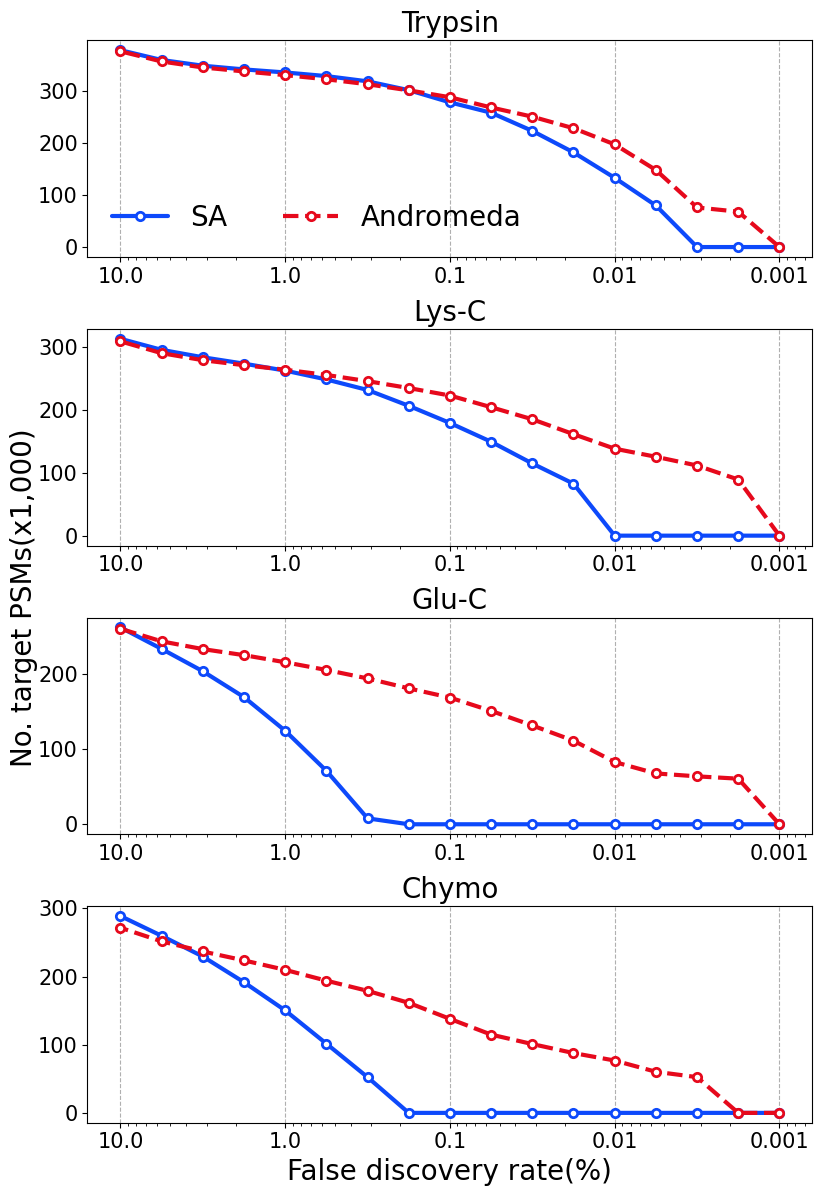

In [4]:
frag_model = 'prosit_l1'

whichs = ['trypsin', "lysc",'gluc', "chymo"]
data2plot = {}
for which, show in zip(whichs, ["Trypsin", "Lys-C", "Glu-C", "Chymo"]):
    result_dir = f"/data/prosit/figs/fig235/{which}/percolator_up/try/{frag_model}"
    
    no_finetuned_dir = os.path.join(result_dir, "no_finetuned_twofold")
    prosit_combined = pd.read_csv(os.path.join(no_finetuned_dir, "prosit_combined_target.psms"), sep='\t')
    prosit_best = pd.read_csv(os.path.join(no_finetuned_dir, "prosit_best_target.psms"), sep='\t')
    sa_feat = pd.read_csv(os.path.join(no_finetuned_dir, "sa_target.psms"), sep='\t')
    andro_feat = pd.read_csv(os.path.join(no_finetuned_dir, "andromeda_target.psms"), sep='\t')

    data2plot[show] = {"score": sa_feat, "andromeda": andro_feat}

plot_andromeda_compare(data2plot, frag_model, legend_loc="lower left", bbox_to_anchor=(0, 0))
        


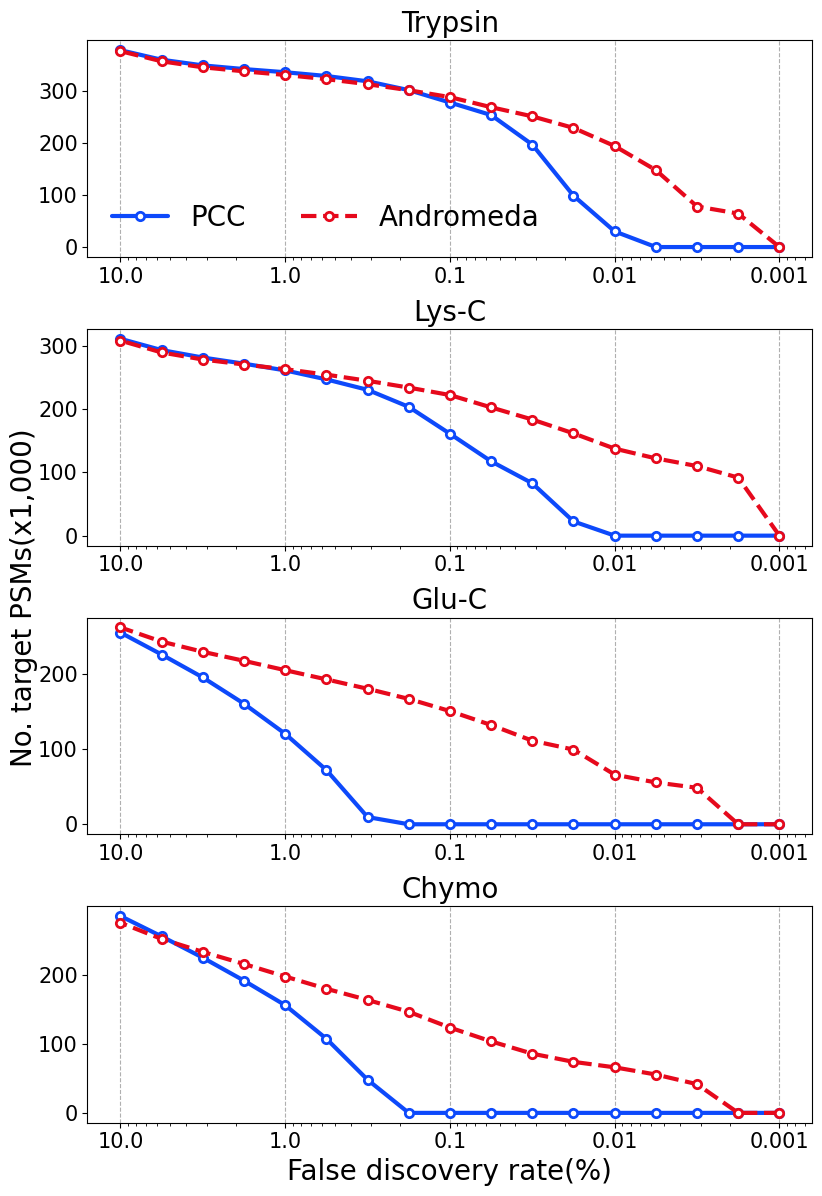

In [5]:
frag_model = 'pdeep2'

whichs = ['trypsin', "lysc", 'gluc', "chymo"]
data2plot = {}
for which, show in zip(whichs, ["Trypsin", "Lys-C", "Glu-C", "Chymo"]):
    result_dir = f"/data/prosit/figs/fig235/{which}/percolator_up/try/{frag_model}"

    no_finetuned_dir = os.path.join(result_dir, "no_finetuned_twofold")
    prosit_combined = pd.read_csv(os.path.join(
        no_finetuned_dir, "prosit_combined_target.psms"), sep='\t')
    prosit_best = pd.read_csv(os.path.join(
        no_finetuned_dir, "prosit_best_target.psms"), sep='\t')
    sa_feat = pd.read_csv(os.path.join(
        no_finetuned_dir, "sa_target.psms"), sep='\t')
    andro_feat = pd.read_csv(os.path.join(
        no_finetuned_dir, "andromeda_target.psms"), sep='\t')

    data2plot[show] = {"score": sa_feat, "andromeda": andro_feat}

plot_andromeda_compare(data2plot, frag_model, score_name="PCC", legend_loc="lower left", bbox_to_anchor=(0, 0))
